In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf
from datetime import datetime,timedelta
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, recall_score, precision_score, accuracy_score

In [ ]:
# Input for stock symbol and date range
stock_symbol = input("Enter stock symbol: ")
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD): ")

# Converting date strings to datetime objects
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Fetching stock price data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

Enter stock symbol: DEO
Enter the start date (YYYY-MM-DD): 1998-01-01
Enter the end date (YYYY-MM-DD): 2025-02-13


[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,DEO,DEO,DEO,DEO,DEO
Date,,,,,
1998-01-02,15.995619,16.211411,15.752852,16.130489,347700
1998-01-05,16.184437,16.238385,15.968644,16.130489,204400
1998-01-06,16.157465,16.184439,16.022595,16.184439,178800
1998-01-07,16.616013,16.723909,16.130480,16.130480,158200
1998-01-08,16.211407,16.346277,16.211407,16.346277,39700


In [ ]:
# Extracting the "Close" prices for training
training_set = stock_data["Close"].values

In [ ]:
#Rescaleing the data
scaler = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
scaled_training_set = scaler.fit_transform(training_set)

In [ ]:
# Preparing training sequences
X_train, y_train = [], []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i - 60:i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Defining the LSTM model
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),
    Dropout(0.2),

    LSTM(units=50),
    Dropout(0.2),

    Dense(units=1)
])

# Compiling the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0162
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0021
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0018
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0014
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0014
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0014
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0011
Epoch 8/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0012
Epoch 9/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0010
Epoch 10/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0013
Epoch 11/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0011
Epoch 12/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 9.8926e-04
Epoch 13/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 9.6331e-04
Epoch 14/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8.8645e-04
Epoch 15/100
212/

In [ ]:
from keras.layers import GRU

# Defining the GRU model
model_gru = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    GRU(units=50, return_sequences=True),
    Dropout(0.2),

    GRU(units=50),
    Dropout(0.2),

    Dense(units=1)
])

# Compiling the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_gru.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0172
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0018
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0015
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0013
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0014
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0010
Epoch 8/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0010
Epoch 9/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0011
Epoch 10/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 9.3654e-04
Epoch 11/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 9.9174e-04
Epoch 12/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.8341e-04
Epoch 13/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 8.3533e-04
Epoch 14/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7.0272e-04
Epoch 15/

In [ ]:
import tensorflow as tf
from keras.layers import Bidirectional, Attention, Input, Reshape, Multiply
from keras.models import Model

# Reshaping X_train for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Defining Input Layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Bidirectional LSTM Layer
bilstm = Bidirectional(LSTM(units=64, return_sequences=True))(input_layer)
dropout1 = Dropout(0.3)(bilstm)

# Attention Mechanism
attention = Dense(1, activation='tanh')(dropout1)
attention = tf.keras.layers.Softmax()(attention)
context_vector = Multiply()([dropout1, attention])

# Final LSTM Layer
lstm_output = LSTM(units=64)(context_vector)
dropout2 = Dropout(0.3)(lstm_output)

# Output Layer
output_layer = Dense(1)(dropout2)

# Creating Model
model_bilstm_attention = Model(inputs=input_layer, outputs=output_layer)

# Compiling Model
model_bilstm_attention.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model
model_bilstm_attention.fit(X_train, y_train, epochs=100, batch_size=32)
print("BiLSTM + Attention Model trained and saved successfully!")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 60, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0189
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0019
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0016
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0012
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0012
Epoch 8/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 9.1795e-04
Epoch 9/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 9.3776e-04
Epoch 10/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.7317e-04
Epoch 11/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.1006e-04
Epoch 12/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 8.6087e-04
Epoch 13/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 7.6581e-04
Epoch 14/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.9853e-04
Epoch 15/100


In [ ]:
# Preparing test data
test_dataset = stock_data["Open"].values
test_dataset = test_dataset.reshape(-1, 1)
scaled_test_data = scaler.transform(test_dataset)

X_test = []

for i in range(60, 80):
    X_test.append(scaled_test_data[i - 60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Predicting the stock prices for LSTM
lstm_predicted_stock_price = model_lstm.predict(X_test)
lstm_predicted_stock_price = scaler.inverse_transform(lstm_predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [ ]:
# Predicting the stock prices for GRU
g_predicted_stock_price = model_gru.predict(X_test)
g_predicted_stock_price = scaler.inverse_transform(g_predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


In [ ]:
# Predict the stock prices for BiLSTM
bi_predicted_stock_price = model_bilstm_attention.predict(X_test)
bi_predicted_stock_price = scaler.inverse_transform(bi_predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (20, 60, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [ ]:
# Extracting the actual test data (Open prices)
actual_stock_price = test_dataset[60:80]

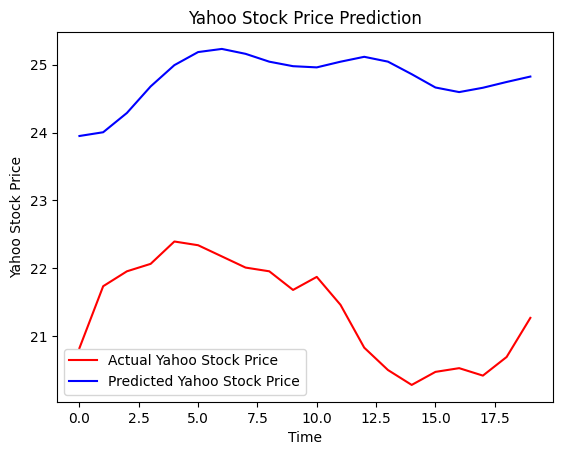

In [ ]:
plt.plot(actual_stock_price, color='red', label='Actual Yahoo Stock Price')
plt.plot(lstm_predicted_stock_price, color='blue', label='Predicted Yahoo Stock Price')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Stock Price')
plt.legend()
plt.show()

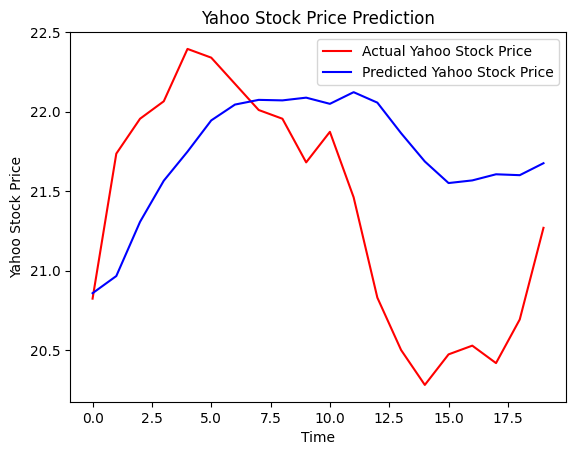

In [ ]:
plt.plot(actual_stock_price, color='red', label='Actual Yahoo Stock Price')
plt.plot(g_predicted_stock_price, color='blue', label='Predicted Yahoo Stock Price')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Stock Price')
plt.legend()
plt.show()

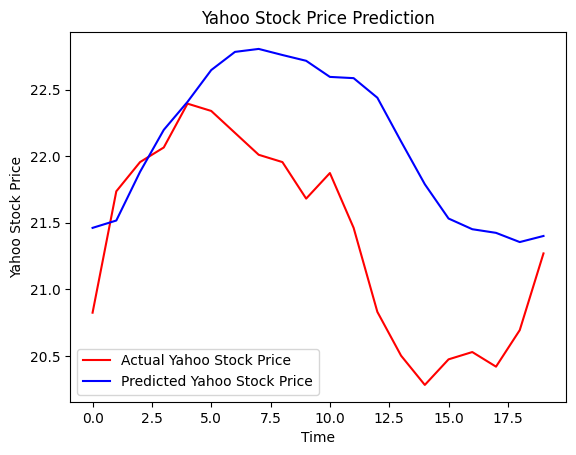

In [ ]:
plt.plot(actual_stock_price, color='red', label='Actual Yahoo Stock Price')
plt.plot(bi_predicted_stock_price, color='blue', label='Predicted Yahoo Stock Price')
plt.title('Yahoo Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Stock Price')
plt.legend()
plt.show()

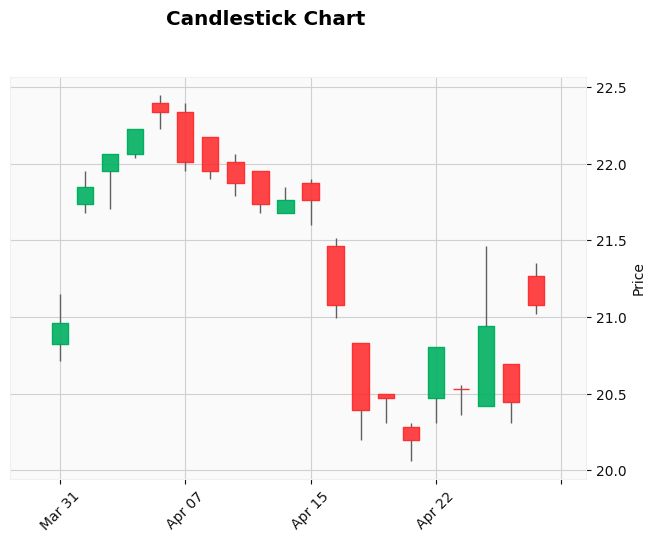

In [ ]:
!pip install mplfinance
import mplfinance as mpf

data = {'Date': stock_data.index[60:80],
        'Open': stock_data["Open"].values[60:80].flatten(),  # Flatten the Open values
        'High': stock_data["High"].values[60:80].flatten(),  # Flatten the High values
        'Low': stock_data["Low"].values[60:80].flatten(),  # Flatten the Low values
        'Close': stock_data["Close"].values[60:80].flatten()}  # Flatten the Close values
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

mpf.plot(df, type='candle', title='Candlestick Chart', style='yahoo', ylabel='Price')

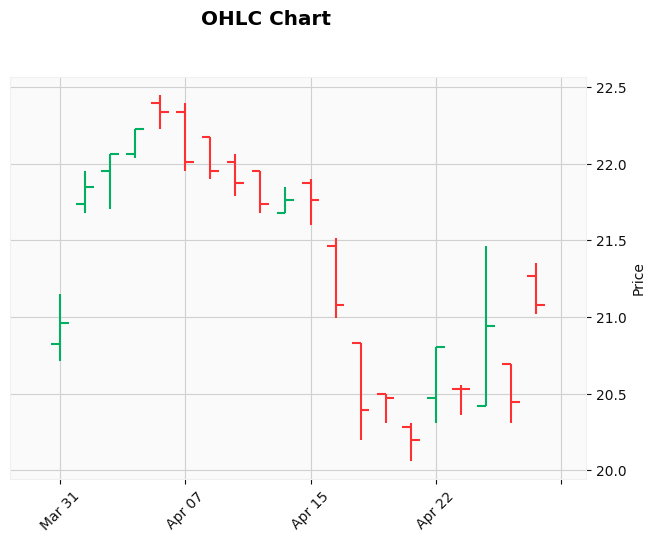

In [ ]:
data = {'Date': stock_data.index[60:80],
        'Open': stock_data["Open"].values[60:80].flatten(),  # Flatten the Open values
        'High': stock_data["High"].values[60:80].flatten(),  # Flatten the High values
        'Low': stock_data["Low"].values[60:80].flatten(),  # Flatten the Low values
        'Close': stock_data["Close"].values[60:80].flatten()}  # Flatten the Close values
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

mpf.plot(df, type='ohlc', title='OHLC Chart', style='yahoo', ylabel='Price')

In [ ]:
# Checking Correlation for LSTM
correlation_l = np.corrcoef(actual_stock_price.flatten(), lstm_predicted_stock_price.flatten())[0, 1]
print(f"Correlation between Actual and Predicted Prices: {correlation_l}")

Correlation between Actual and Predicted Prices: 0.24653062823121266


In [ ]:
correlation_g = np.corrcoef(actual_stock_price.flatten(), g_predicted_stock_price.flatten())[0, 1]
print(f"Correlation between Actual and Predicted Prices: {correlation_g}")

Correlation between Actual and Predicted Prices: 0.2578380687507508


In [ ]:
correlation_bi = np.corrcoef(actual_stock_price.flatten(), bi_predicted_stock_price.flatten())[0, 1]
print(f"Correlation between Actual and Predicted Prices: {correlation_bi}")

Correlation between Actual and Predicted Prices: 0.6738462046269952


In [ ]:
# Calculating performance metrics
mae_l = mean_absolute_error(actual_stock_price, lstm_predicted_stock_price)
mse_l = mean_squared_error(actual_stock_price, lstm_predicted_stock_price)
rmse_l = np.sqrt(mse_l)

print(f"Mean Absolute Error: {mae_l}")
print(f"Mean Squared Error: {mse_l}")
print(f"Root Mean Squared Error: {rmse_l}")

Mean Absolute Error: 3.4282486590948364
Mean Squared Error: 12.261560627910507
Root Mean Squared Error: 3.501651128812022


In [ ]:
mae_g = mean_absolute_error(actual_stock_price, g_predicted_stock_price)
mse_g = mean_squared_error(actual_stock_price, g_predicted_stock_price)
rmse_g = np.sqrt(mse_g)

print(f"Mean Absolute Error: {mae_g}")
print(f"Mean Squared Error: {mse_g}")
print(f"Root Mean Squared Error: {rmse_g}")

Mean Absolute Error: 0.6580117938748706
Mean Squared Error: 0.624181830982938
Root Mean Squared Error: 0.7900517900637515


In [ ]:
mae_b = mean_absolute_error(actual_stock_price, bi_predicted_stock_price)
mse_b = mean_squared_error(actual_stock_price, bi_predicted_stock_price)
rmse_b = np.sqrt(mse_b)

print(f"Mean Absolute Error: {mae_b}")
print(f"Mean Squared Error: {mse_b}")
print(f"Root Mean Squared Error: {rmse_b}")

Mean Absolute Error: 0.7488725318445943
Mean Squared Error: 0.7983289494794403
Root Mean Squared Error: 0.8934925570363976


In [ ]:
# Calculating F1-score, recall, precision, and accuracy
threshold = 0.0  # Define a threshold for classifying as 'up' or 'down'
predicted_direction = np.where(lstm_predicted_stock_price > threshold, 1, 0)
actual_direction = np.where(np.array(actual_stock_price) > threshold, 1, 0)
f1 = f1_score(actual_direction, predicted_direction)
recall = recall_score(actual_direction, predicted_direction)
precision = precision_score(actual_direction, predicted_direction)
accuracy = accuracy_score(actual_direction, predicted_direction)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0


In [ ]:
threshold = 0.0
g_predicted_direction = np.where(g_predicted_stock_price > threshold, 1, 0)
actual_direction = np.where(np.array(actual_stock_price) > threshold, 1, 0)
f1 = f1_score(actual_direction, g_predicted_direction)
recall = recall_score(actual_direction, g_predicted_direction)
precision = precision_score(actual_direction, g_predicted_direction)
accuracy = accuracy_score(actual_direction, g_predicted_direction)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0


In [ ]:
threshold = 0.0
bi_predicted_direction = np.where(bi_predicted_stock_price > threshold, 1, 0)
actual_direction = np.where(np.array(actual_stock_price) > threshold, 1, 0)
f1 = f1_score(actual_direction, bi_predicted_direction)
recall = recall_score(actual_direction, bi_predicted_direction)
precision = precision_score(actual_direction, bi_predicted_direction)
accuracy = accuracy_score(actual_direction, bi_predicted_direction)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0


In [ ]:
# Creating a confusion matrix
confusion = confusion_matrix(actual_direction, predicted_direction)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[20]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
confusion_g = confusion_matrix(actual_direction, g_predicted_direction)
print("Confusion Matrix:")
print(confusion_g)

Confusion Matrix:
[[20]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
confusion_bi = confusion_matrix(actual_direction, bi_predicted_direction)
print("Confusion Matrix:")
print(confusion_bi)

Confusion Matrix:
[[20]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Creating a classification report
classification_rep = classification_report(actual_direction, predicted_direction)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
classification_rep_g = classification_report(actual_direction, g_predicted_direction)
print("Classification Report:")
print(classification_rep_g)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
classification_rep_bi = classification_report(actual_direction, bi_predicted_direction)
print("Classification Report:")
print(classification_rep_bi)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



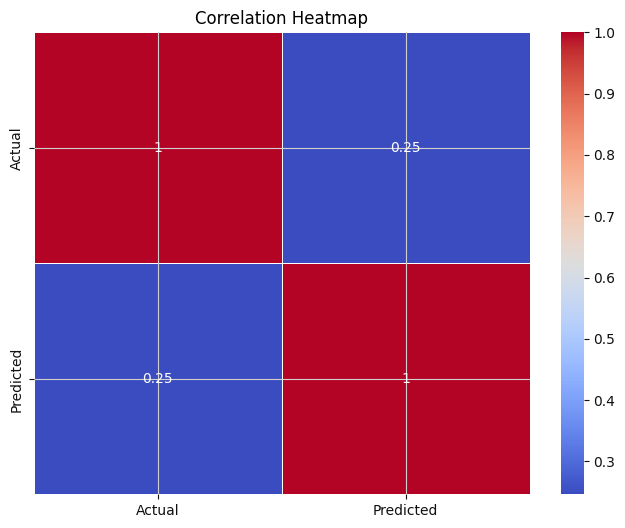

In [ ]:
# Calculating correlation between actual and predicted prices
correlation = np.corrcoef(actual_stock_price.flatten(), lstm_predicted_stock_price.flatten())[0, 1]

# Creating a DataFrame for the correlation matrix
correlation_matrix = pd.DataFrame({'Actual': actual_stock_price.flatten(), 'Predicted': lstm_predicted_stock_price.flatten()})

# Calculating the correlation matrix
corr_matrix = correlation_matrix.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

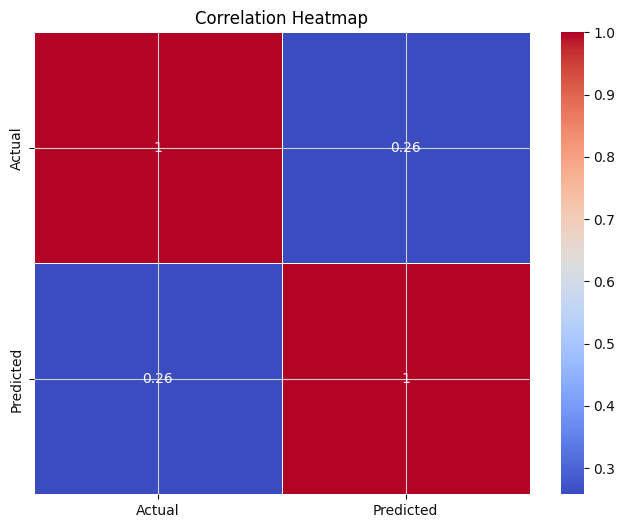

In [ ]:
correlation = np.corrcoef(actual_stock_price.flatten(), g_predicted_stock_price.flatten())[0, 1]
correlation_matrix = pd.DataFrame({'Actual': actual_stock_price.flatten(), 'Predicted': g_predicted_stock_price.flatten()})
corr_matrix = correlation_matrix.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

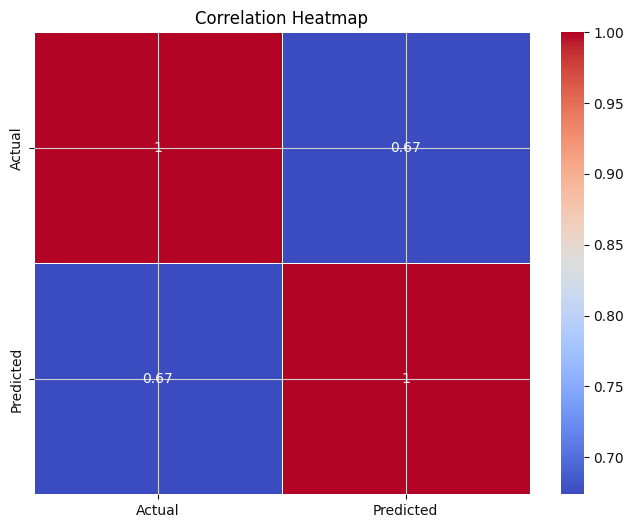

In [ ]:
correlation = np.corrcoef(actual_stock_price.flatten(), bi_predicted_stock_price.flatten())[0, 1]
correlation_matrix = pd.DataFrame({'Actual': actual_stock_price.flatten(), 'Predicted': bi_predicted_stock_price.flatten()})
corr_matrix = correlation_matrix.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
future_date_str = input("Enter the future date for prediction (YYYY-MM-DD): ")

# Converting the future date string to a datetime object
future_date = datetime.strptime(future_date_str, "%Y-%m-%d")

# Calculating the number of past days to use for prediction (should match the model's input sequence length)
sequence_length = 60

# Extracting the historical data for the specified number of past days leading up to the future date
start_date = future_date - timedelta(days=sequence_length)
end_date = future_date

# Fetching historical stock data for the specified date range
historical_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extracting the "Close" prices
historical_prices = historical_data["Close"].values

# Scaling the historical prices using the same scaler used for training
scaled_historical_prices = scaler.transform(historical_prices.reshape(-1, 1))

# Preparing the input sequence for prediction
X_predict = [scaled_historical_prices[-sequence_length:].flatten()]
X_predict = np.array(X_predict)

# Reshaping X_predict to match the model's input shape
X_predict = X_predict.reshape(X_predict.shape[0], X_predict.shape[1], 1)

# Using the trained model to predict the stock price for the future date
predicted_price = model_lstm.predict(X_predict)

# Inversing transform the predicted price to get the actual stock price
predicted_price = scaler.inverse_transform(predicted_price)

# Printing the predicted price for the future date
print(f"Predicted stock price on {future_date_str}: {predicted_price[0, 0]}")

Enter the future date for prediction (YYYY-MM-DD): 2025-02-14


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Predicted stock price on 2025-02-14: 109.00529479980469


In [ ]:
future_date_str = input("Enter the future date for prediction (YYYY-MM-DD): ")
future_date = datetime.strptime(future_date_str, "%Y-%m-%d")

sequence_length = 60
start_date = future_date - timedelta(days=sequence_length)
end_date = future_date

historical_data = yf.download(stock_symbol, start=start_date, end=end_date)
historical_prices = historical_data["Close"].values
scaled_historical_prices = scaler.transform(historical_prices.reshape(-1, 1))

X_predict = [scaled_historical_prices[-sequence_length:].flatten()]
X_predict = np.array(X_predict)
X_predict = X_predict.reshape(X_predict.shape[0], X_predict.shape[1], 1)

predicted_price = model_gru.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"Predicted stock price on {future_date_str}: {predicted_price[0, 0]}")

Enter the future date for prediction (YYYY-MM-DD): 2025-02-14


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted stock price on 2025-02-14: 108.61347961425781


In [ ]:
future_date_str = input("Enter the future date for prediction (YYYY-MM-DD): ")
future_date = datetime.strptime(future_date_str, "%Y-%m-%d")

sequence_length = 60
start_date = future_date - timedelta(days=sequence_length)
end_date = future_date

historical_data = yf.download(stock_symbol, start=start_date, end=end_date)
historical_prices = historical_data["Close"].values
scaled_historical_prices = scaler.transform(historical_prices.reshape(-1, 1))

X_predict = [scaled_historical_prices[-sequence_length:].flatten()]
X_predict = np.array(X_predict)
X_predict = X_predict.reshape(X_predict.shape[0], X_predict.shape[1], 1)

predicted_price = model_bilstm_attention.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"Predicted stock price on {future_date_str}: {predicted_price[0, 0]}")

Enter the future date for prediction (YYYY-MM-DD): 2025-02-14


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Predicted stock price on 2025-02-14: 104.33248901367188
